In [1]:
#-----------------------------------------------------------------------
# Modules for import
#-----------------------------------------------------------------------
import matplotlib.pyplot as plt  
import pandas as pd 
import hb_functions as hb
from sqlalchemy import create_engine
import sys
import seaborn as sns
import numpy as np
import itertools
sns.set_style("whitegrid")
#sns.set_style("whitegrid", {'axes.grid' : False})

%matplotlib inline

In [2]:
'''
#-----------------------------------------------------------------------
#Define database
#-----------------------------------------------------------------------
'''
haushaltsbuch_db = create_engine('sqlite:////Users/Potzenhotz/data/database/haushaltsbuch.db')

In [3]:
'''
-----------------------------------------------------------------------
 CORE: Read table
-----------------------------------------------------------------------
'''
var_jahr = '2017'
var_monat = '4'
print('Start reading tables')
mart_sql_query = 'select * from dm_konsum;' 
loaded_dm_konsum = hb.read_sql(haushaltsbuch_db, mart_sql_query)
#loaded_dm_konsum.set_index('index', inplace=True)
loaded_dm_konsum["Zeit"] = loaded_dm_konsum["Jahr"].map(str) + '/' + loaded_dm_konsum["Monat"].map(str)
loaded_dm_konsum.set_index('Zeit', inplace=True)
#print(loaded_dm_konsum) 
loaded_dm_konsum = loaded_dm_konsum.drop('Jahr', 1)
loaded_dm_konsum = loaded_dm_konsum.drop('Monat', 1)
loaded_dm_konsum = loaded_dm_konsum.drop('index', 1)
loaded_dm_konsum = loaded_dm_konsum.drop(['0/0'])
#loaded_dm_konsum = loaded_dm_konsum.replace('0', np.nan)
print(loaded_dm_konsum)

Start reading tables
         Amazon  Buecher  Drogerie  Elektronik  Kleidung  Lotto  Paypal  \
Zeit                                                                      
2016/7    41.94     0.00      0.00       11.99     63.92    0.0    0.00   
2016/8    35.98     0.00      0.00        0.00      0.00    0.0    7.39   
2016/9   282.02    39.90      5.35        0.00     59.98    0.0   93.97   
2016/10    8.89     0.00     36.14       51.99     99.99    0.0   53.48   
2016/11   97.35    19.99      0.00       99.95    130.05    0.0   90.72   
2016/12  276.31    67.84     54.40        0.00      0.00    0.0  344.70   
2017/1    42.91     0.00      2.75       16.99     49.95   11.5   14.98   
2017/2    46.39    76.58      0.00        0.00     89.99    0.0    9.99   
2017/3    67.07     0.00      2.75        6.99     53.97    0.0   79.96   
2017/4   142.87     3.50      6.55        0.00      0.00    0.0   52.97   
2017/5   109.30    10.50     27.40        4.99     72.00    0.0  120.55   
2017

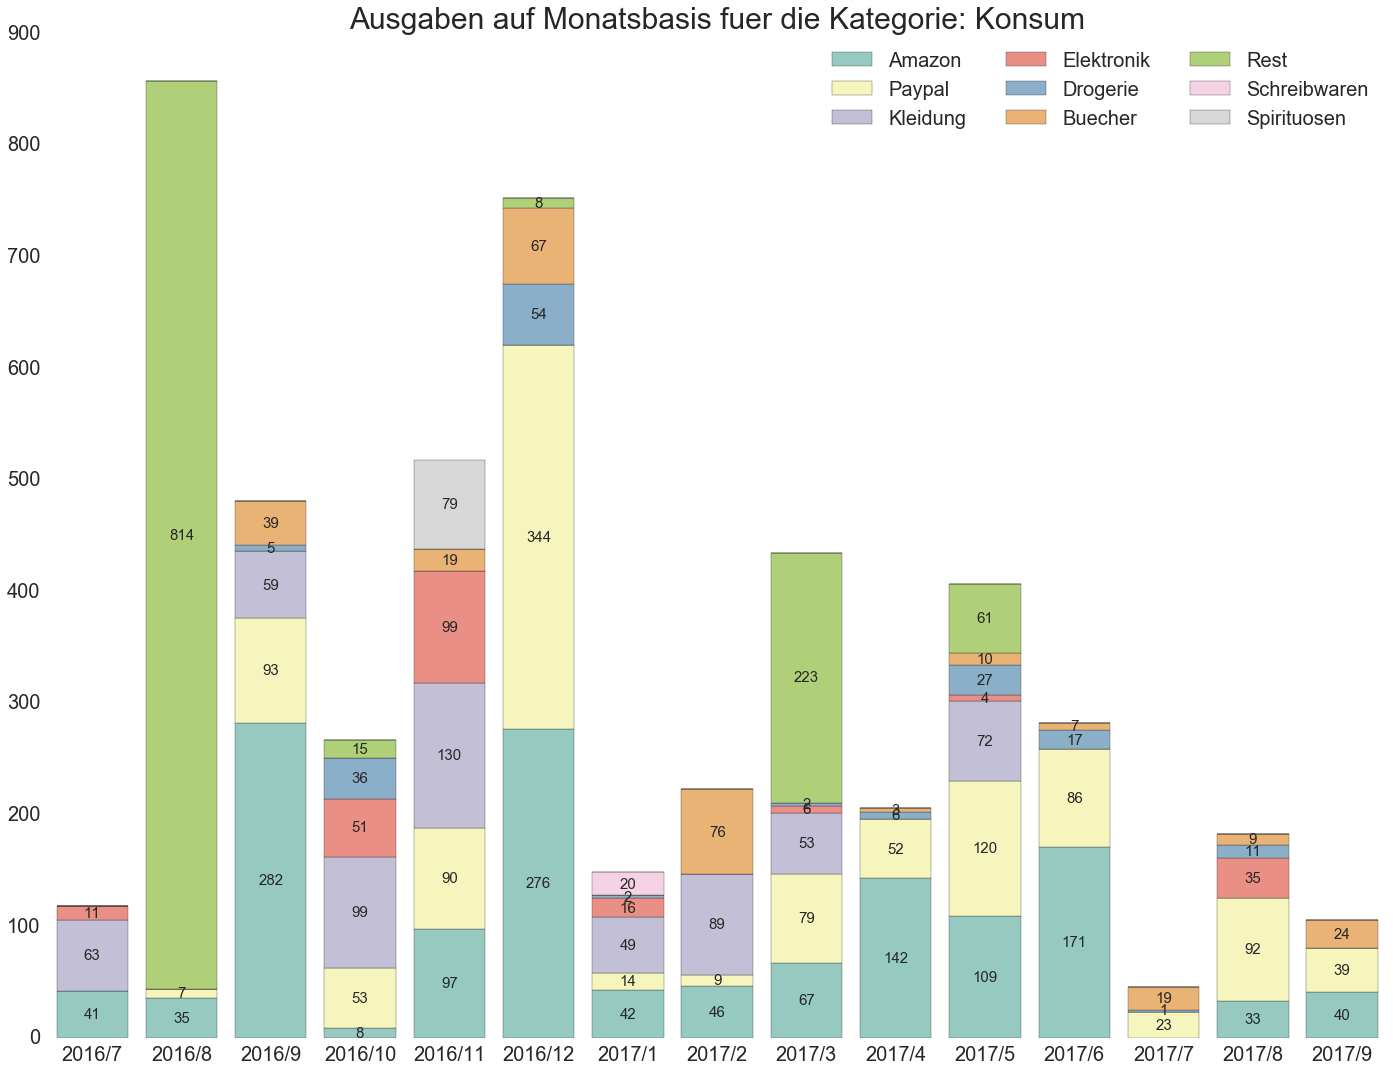

In [4]:
f, ax = plt.subplots(figsize=(24, 18))

#sns.set(font_scale=3.5)


# Plot the total crashes
sns.set_color_codes("pastel")
#sns.palplot(sns.color_palette("Set2", 10))
#sns.color_palette("muted")
#palette = itertools.cycle(sns.color_palette("hls", 9))
#palette = itertools.cycle(sns.color_palette("Set2", 10))
#palette = itertools.cycle(sns.color_palette("Paired", 10))
palette = itertools.cycle(sns.color_palette("Set3", 10))

index = loaded_dm_konsum.index
cn1 = 'Amazon'
cn2 = 'Paypal'
cn3 = 'Kleidung'
cn4 = 'Elektronik'
cn5 = 'Drogerie'
cn6 = 'Buecher'
cn7 = 'Rest'
cn8 = 'Schreibwaren'
cn9 = 'Spirituosen'
cn10 = 'Lotto'
c1 = loaded_dm_konsum[cn1]
c2 = loaded_dm_konsum[cn2]
c3 = loaded_dm_konsum[cn3]
c4 = loaded_dm_konsum[cn4]
c5 = loaded_dm_konsum[cn5]
c6 = loaded_dm_konsum[cn6]
c7 = loaded_dm_konsum[cn7]
c8 = loaded_dm_konsum[cn8]
c9 = loaded_dm_konsum[cn9]
c10 = loaded_dm_konsum[cn10]
sns_plot = sns.barplot(x=index, y=c1, label=cn1, color=next(palette))
sns_plot = sns.barplot(x=index, y=c2, label=cn2, color=next(palette), bottom=c1 )
sns_plot = sns.barplot(x=index, y=c3, label=cn3, color=next(palette), bottom=c1+c2 )
sns_plot = sns.barplot(x=index, y=c4, label=cn4, color=next(palette), bottom=c1+c2+c3 )
sns_plot = sns.barplot(x=index, y=c5, label=cn5, color=next(palette), bottom=c1+c2+c3+c4 )
sns_plot = sns.barplot(x=index, y=c6, label=cn6, color=next(palette), bottom=c1+c2+c3+c4+c5)
sns_plot = sns.barplot(x=index, y=c7, label=cn7, color=next(palette), bottom=c1+c2+c3+c4+c5+c6)
sns_plot = sns.barplot(x=index, y=c8, label=cn8, color=next(palette), bottom=c1+c2+c3+c4+c5+c6+c7)
sns_plot = sns.barplot(x=index, y=c9, label=cn9, color=next(palette), bottom=c1+c2+c3+c4+c5+c6+c7+c8)
#sns_plot = sns.barplot(x=index, y=c10, label=cn10, color=next(palette), bottom=c1+c2+c3+c4+c5+c6+c7+c8+c10)
#loaded_dm_konsum.plot(kind='bar', stacked=True)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0:
        continue
    #print(width)
    #print(height)
    #print(p.get_x())
    #print(p.get_y())
    ax.text(p.get_x()+width/2,
            p.get_y()+height/2,
            int(height)
           , ha='center'
           , va='center'
           , fontsize=15) 
#print(ax.patches)

# Turn off tick labels
#ax.set_xticklabels([])
# Turns off grid on the left Axis.
ax.grid(False)

#ax.set_yticks(list(range(100,5000,100)))
#ax.set_yticklabels(list(range(0,5000,500)))
# Add a legend and infoormative axis label
ax.legend(ncol=3, loc="upper right", frameon=False, fontsize=20)
ax.set(ylabel="", xlabel="")
sns.despine(left=True, bottom=True)
ax.set_title('Ausgaben auf Monatsbasis fuer die Kategorie: Konsum', fontsize=30)
ax.tick_params(labelsize=20)
fig1 = plt.gcf()

In [5]:
#plt.savefig("/Users/Potzenhotz/data/final_data/hb_plot.png", bbox_inches="tight")  
plot_name = 'monthly_expenses_konsum'
plot_full_name = "/Users/Potzenhotz/data/final_data/" + plot_name + ".png"
plot_full_name_2 = "/Users/Potzenhotz/Dropbox/haushaltsbuch/" + plot_name + ".png"
fig1.savefig(plot_full_name)  
fig1.savefig(plot_full_name_2) 